In [1]:
#from google.colab import drive
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt

In [12]:
# Load the unzipped files, that is train and test dataset
# Structure => train{infected, normal}, test{infected, normal}

print("Loading train set...")

root_dir = "./Assignment 5 Dataset"

# Define transforms for normalization of data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
valid_transforms = transforms.Compose([transforms.Resize(512),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(root_dir + "/train/", transform=train_transforms)
print("Loading Complete!")

Loading train set...
Loading Complete!


In [3]:
#train_data
len(train_data.samples)

12000

In [13]:
print("Loading Validation set...")
valid_data = datasets.ImageFolder(root_dir + "/validation/", transform=test_transforms)
len(valid_data.samples)

Loading Validation set...


1500

In [5]:
# Extract classes from train data
class_names = train_data.classes
class_names

['infected', 'normal']

In [14]:
# Define train and test loaders
trainLoader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
validLoader = torch.utils.data.DataLoader(valid_data, batch_size=10, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


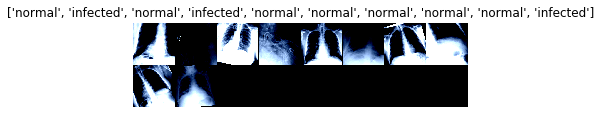

In [7]:
# Show a single or batch of images
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainLoader))
show_databatch(inputs, classes)

In [15]:
# Load VGG-16
vgg16 = models.vgg16(pretrained=True)
#print(vgg16) 

In [16]:
# Removing last layer of vgg 16
num_features = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1] # Remove last layer
print(features)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False)]


In [17]:
# Freeze training for all layers VGG16
for param in vgg16.features.parameters():
    param.require_grad = False

In [18]:
# Add 2 fully connectd layers to Vgg 16

features.extend([nn.Linear(num_features, 210)]) #[(11*10) + 100]
features.extend([nn.Linear(210, len(class_names))])

# Add the new layers back in the network
vgg16.classifier = nn.Sequential(*features)
#print(vgg16)

In [0]:
# Load RESNET-18
resnet18 = models.resnet18(pretrained=True)
print(resnet18) 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
# Removing last layer of resnet 18
num_features_resnet = resnet18.fc.in_features
featuresResnet = list(resnet18.fc.children())[:-1] # Remove last layer
print(featuresResnet)

[]


In [0]:
# Freeze the layers of resnet 18 if any
for param in resnet18.fc.parameters():# features.parameters():
    param.require_grad = False

In [0]:
# Add 2 fully connectd layers to Resnet 18

featuresResnet.extend([nn.Linear(num_features_resnet, 210)]) #[(11*10) + 100]
featuresResnet.extend([nn.Linear(210, len(class_names))])

# Add the new layers back in the network
resnet18.fc = nn.Sequential(*featuresResnet)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
# Training the vgg 16

Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

vgg16.train()

_loss = []

for epoch in range(Epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainLoader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = vgg16(inputs)             #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()

        _loss.append(running_loss)
        
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainLoader.dataset),
                100. * i / len(trainLoader),
                loss.item()))
        
    torch.save(vgg16.state_dict(), 'vgg16_FC_Only.pth')

print('Finished Training')


Finished Training


In [23]:
# A full VGG16 NETWORK

VGG16_2 = models.vgg16(pretrained=True)

for param in VGG16_2.features.parameters():
    param.require_grad = True

print("Downloaded vgg16!")

Downloaded vgg16!


In [11]:
# Training the vgg 16

Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(VGG16_2.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
VGG16_2.to(device)

VGG16_2.train()

_vgg16loss = []

for epoch in range(Epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainLoader))
    #print(pbar)
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = VGG16_2(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
        loss.copy_

        _vgg16loss.append(loss.item())
        
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainLoader.dataset),
                100. * i / len(trainLoader),
                loss.item()))
        
    torch.save(VGG16_2.state_dict(), 'vgg16_entire.pth')

print('Finished Training')


Finished Training


In [26]:
# Test the trained VGG16 network with 2 layers and Fully trained network
vgg16.load_state_dict(torch.load("vgg16_FC_Only.pth"))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
correct = 0
total = 0
with torch.no_grad():
    for data in validLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on valid set: %d %%' % (
    100 * correct / total))

Accuracy of the network on valid set: 88 %


In [24]:
# # Test the Fully trained VGG16 network
VGG16_2.load_state_dict(torch.load("vgg16_entire.pth"))

# Uncomment if device is not defined
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
VGG16_2.to(device)

correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = VGG16_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the fully trained vgg16 network on valid set: %d %%' % (
    100 * correct / total))

Accuracy of the fully trained vgg16 network on valid set: 95 %


In [0]:
# Train the RESNET 18 network

Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

resnet18.train()

for epoch in range(Epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainLoader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = resnet18(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
        
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainLoader.dataset),
                100. * i / len(trainLoader),
                loss.item()))
        
    torch.save(resnet18.state_dict(), 'res18_FC_Only.pth')

print('Finished Training')


Finished Training


In [0]:
# Test the trained RESNET18 network

correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of resnet18 on test images: %d %%' % (
    100 * correct / total))

Accuracy of resnet18 on test images: 94 %


In [0]:
# Load RESNET-18, for the full train 

print("Training the full RESNET 18...\n")

resnet18_2 = models.resnet18(pretrained=True)

for param in resnet18_2.fc.parameters():# features.parameters():
    param.require_grad = True

# Train the RESNET 18 network

Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18_2.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet18_2.to(device)
_resnet18Loss = []
resnet18_2.train()

for epoch in range(Epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainLoader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        outputs = resnet18_2(inputs)               #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
        _resnet18Loss.append(loss.item())
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainLoader.dataset),
                100. * i / len(trainLoader),
                loss.item()))
    
    torch.save(resnet18_2.state_dict(), 'res18_entire.pth')

print('Finished Training')

Training the full RESNET 18...



Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



Finished Training


In [0]:
# Test the fully trained resnet 18

correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of fully trained resnet18 on test images: %d %%' % (
    100 * correct / total))

Accuracy of fully trained resnet18 on test images: 92 %


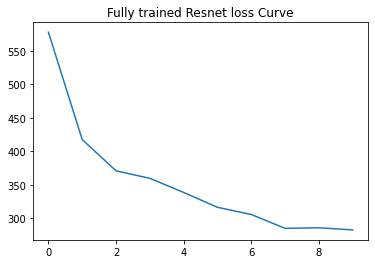

In [0]:
# Plotting the full trained resnet18 loss
avgLosses = []
startIndex = 0
endIndex = 1200
for x in range(10):
  avgLosses.append(sum(_resnet18Loss[startIndex:endIndex]))
  startIndex = startIndex + 1200
  endIndex = endIndex + 1200

plt.title("Fully trained Resnet loss Curve")
plt.plot(range(10), list(avgLosses))
plt.show()

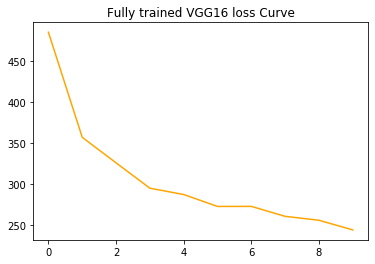

In [14]:
# Plotting the full trained VGG16 loss

avgLosses = []
startIndex = 0
endIndex = 1200
for x in range(10):
  avgLosses.append(sum(_vgg16loss[startIndex:endIndex]))
  startIndex = startIndex + 1200
  endIndex = endIndex + 1200

plt.title("Fully trained VGG16 loss Curve")
plt.plot(range(10), list(avgLosses), color='orange')
plt.show()